In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
dataset= pd.read_csv("../input/digit-recognizer/train.csv")
print(dataset.shape)

(42000, 785)


In [4]:
dataset.head() #dataframe

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
trainx= dataset.drop(['label'],axis=1).values #drop label column
trainy= dataset['label'].values #taking label column

In [6]:
trainx[0] #1 pixel value

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [7]:
trainy[0]

1

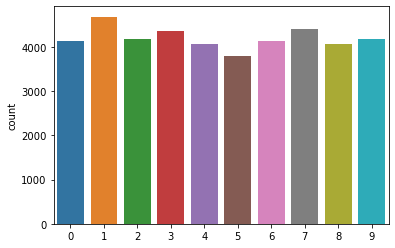

In [8]:
sns.countplot(trainy)

In [9]:
testdata = pd.read_csv("../input/digit-recognizer/test.csv")
testdata.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
test = testdata.values
test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  10,  17,  17,  17,  17,  81, 180, 180,
        35,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 139, 253, 253, 253, 253, 253,
       253, 253,  48,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  60, 228, 253, 25

In [11]:
trainx = trainx.astype('float32')
trainy = trainy.astype('int32')
test= test.astype('float32')

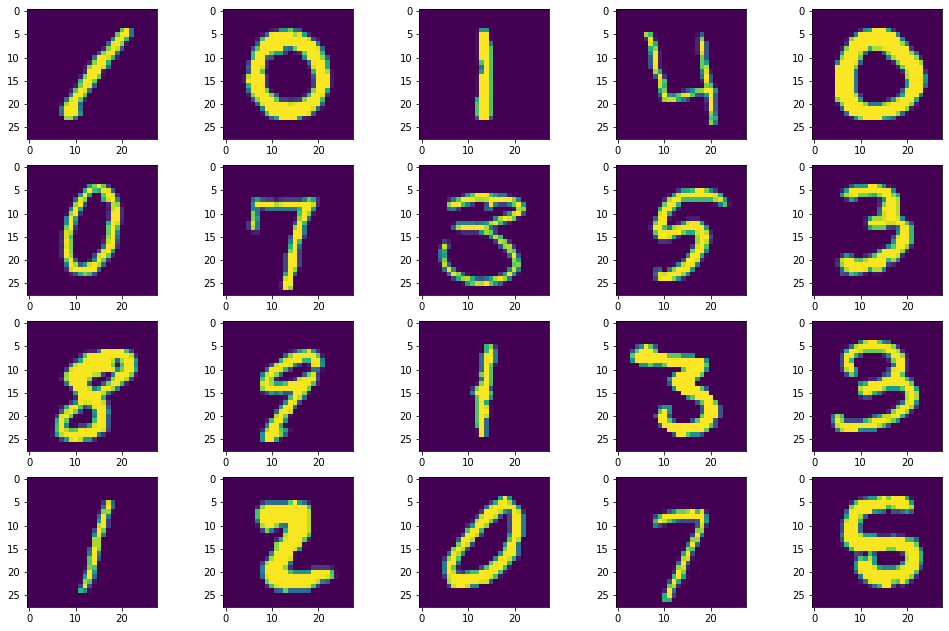

In [12]:
plt.figure(figsize=(17,11))
x, y = 5,4
for i in range(20):  
    plt.subplot(y, x, i+1)
    plt.imshow(trainx[i].reshape((28,28)),interpolation='nearest')
plt.show()

In [13]:
trainx = trainx/255.0
test = test/255.0

In [14]:
trainx = trainx.reshape(trainx.shape[0],28,28,1)
test = test.reshape(test.shape[0],28,28,1)


In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [16]:
trainy = pd.get_dummies(trainy)
trainy

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
41995,1,0,0,0,0,0,0,0,0,0
41996,0,1,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,1,0,0
41998,0,0,0,0,0,0,1,0,0,0


In [17]:
trainx, valx, trainy, valy = train_test_split(trainx, trainy, test_size = 0.1, random_state=42)

In [18]:
cnn = Sequential()
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Dropout(0.3))

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=32, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))
cnn.add(Dense(units=10, activation = "softmax"))

In [19]:
cnn.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
my_callbacks = [keras.callbacks.EarlyStopping(patience=10)]

In [20]:
datagen = ImageDataGenerator(
        rotation_range=15, 
        zoom_range = 0.1,  
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False) 
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0

In [21]:
datagen.fit(trainx)
history = cnn.fit_generator(datagen.flow(trainx,trainy, batch_size=64),epochs = 20, 
                  validation_data = (valx,valy),verbose = 1,callbacks= my_callbacks)

Epoch 1/20
591/591 [==============================] - 43s 74ms/step - loss: 0.5344 - accuracy: 0.8389 - val_loss: 0.0622 - val_accuracy: 0.9795
Epoch 2/20
591/591 [==============================] - 43s 73ms/step - loss: 0.1638 - accuracy: 0.9509 - val_loss: 0.0488 - val_accuracy: 0.9855
Epoch 3/20
591/591 [==============================] - 43s 73ms/step - loss: 0.1263 - accuracy: 0.9638 - val_loss: 0.0334 - val_accuracy: 0.9893
Epoch 4/20
591/591 [==============================] - 43s 72ms/step - loss: 0.1054 - accuracy: 0.9679 - val_loss: 0.0329 - val_accuracy: 0.9910
Epoch 5/20
591/591 [==============================] - 44s 74ms/step - loss: 0.0940 - accuracy: 0.9713 - val_loss: 0.0332 - val_accuracy: 0.9921
Epoch 6/20
591/591 [==============================] - 44s 74ms/step - loss: 0.0861 - accuracy: 0.9745 - val_loss: 0.0326 - val_accuracy: 0.9912
Epoch 7/20
591/591 [==============================] - 43s 73ms/step - loss: 0.0743 - accuracy: 0.9776 - val_loss: 0.0365 - val_accuracy:

In [22]:
final_loss, final_acc = cnn.evaluate(valx, valy, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 0.025965, final accuracy: 0.992857


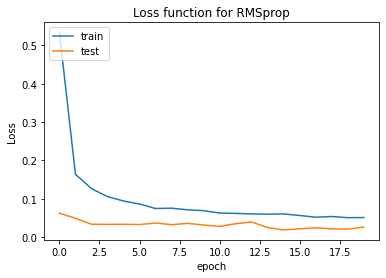

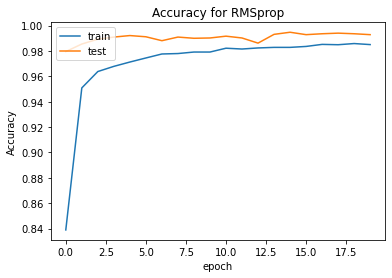

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss function for RMSprop')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy for RMSprop')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
predictions = cnn.predict_classes(test)
submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("submit.csv", index=False, header=True)